# MiniProyecto: Storytelling Con Datos De Cafe

Notebook demostrativo orientado a negocio.

## Objetivo
Identificar patrones de consumo y comunicar insights accionables.

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


def get_repo_root(start: Path | None = None) -> Path:
    base = (start or Path.cwd()).resolve()
    for candidate in [base, *base.parents]:
        if (candidate / "README.md").exists() and (candidate / "MiniProyecto").exists():
            return candidate
    return base


ROOT = get_repo_root()
print(f"Repo root: {ROOT}")

df = pd.read_parquet(ROOT / "MiniProyecto/coffee_db.parquet")
df.head()


Repo root: C:\Users\deramire\OneDrive - Diaco S.A\Escritorio\MIGITHUB\ciencia-datos-python


,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


## 1) Top paises por consumo total
Este ranking ayuda a priorizar mercados.

In [2]:
top10 = df.nlargest(10, "Total_domestic_consumption")[["Country", "Total_domestic_consumption"]]
top10

,Country,Total_domestic_consumption
2,Brazil,27824700000
5,Indonesia,4920480000
29,Ethiopia,4536540000
41,Mexico,3189660000
18,Philippines,2807280000
23,Colombia,2536776384
52,Venezuela,2386067999
36,India,2093460000
53,Viet Nam,1920928320
48,Thailand,1248600000


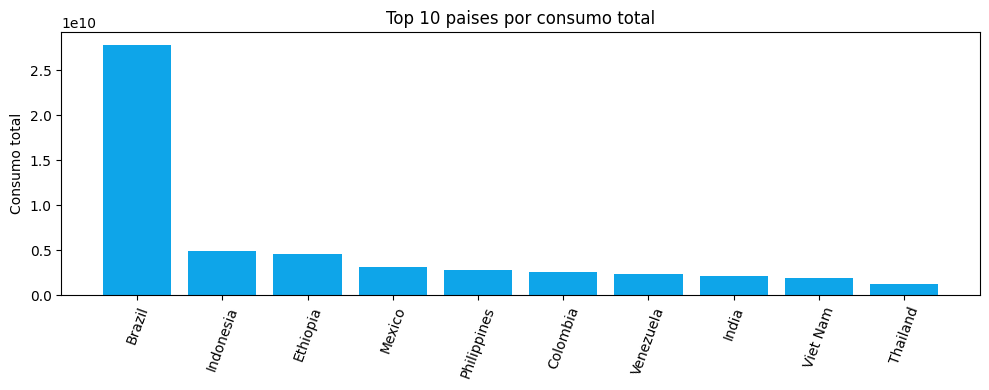

In [3]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(top10["Country"], top10["Total_domestic_consumption"], color="#0ea5e9")
ax.set_title("Top 10 paises por consumo total")
ax.set_ylabel("Consumo total")
ax.tick_params(axis="x", rotation=70)
plt.tight_layout()
plt.show()

## 2) Evolucion temporal (top 5)
Se evalua tendencia para detectar crecimiento sostenido.

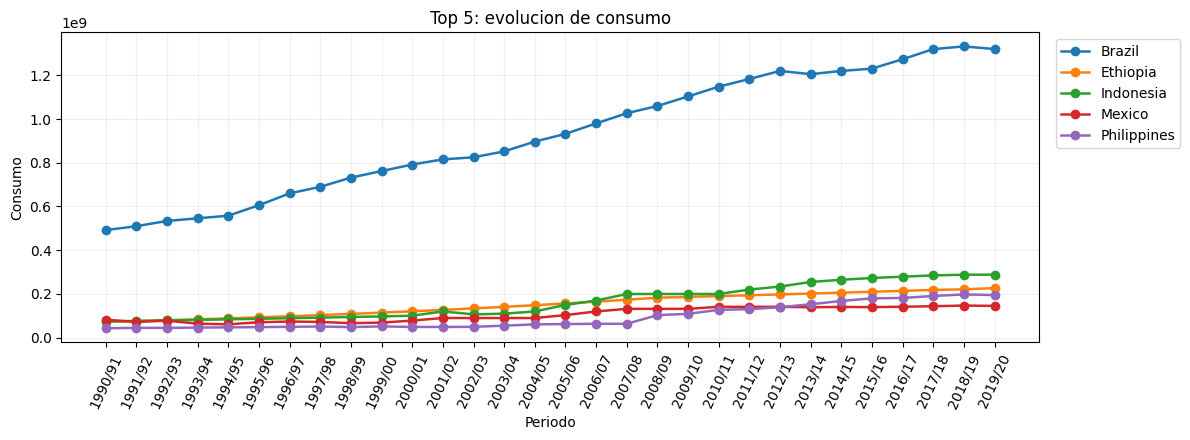

In [4]:
year_cols = [c for c in df.columns if "/" in c]
top5 = df.nlargest(5, "Total_domestic_consumption")
long_df = top5.melt(id_vars=["Country"], value_vars=year_cols, var_name="period", value_name="consumption")

fig, ax = plt.subplots(figsize=(12,4.5))
for country, part in long_df.groupby("Country"):
    ax.plot(part["period"], part["consumption"], marker="o", linewidth=1.8, label=country)
ax.set_title("Top 5: evolucion de consumo")
ax.set_xlabel("Periodo")
ax.set_ylabel("Consumo")
ax.tick_params(axis="x", rotation=65)
ax.grid(alpha=0.2)
ax.legend(loc="upper left", bbox_to_anchor=(1.01,1))
plt.tight_layout()
plt.show()

## 3) Lectura ejecutiva
- Existen mercados con consumo consistentemente alto.
- La tendencia temporal permite planificar inventario y expansion.
- El siguiente paso es conectar este analisis con un modelo de forecasting.